KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data= pd.read_csv('Classified Data',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(data.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_feature = scaler.transform(data.drop("TARGET CLASS",axis=1))

In [18]:
df_feat = pd.DataFrame(scaled_feature,columns=data.columns[:-1])


In [14]:
from sklearn.cross_validation import train_test_split

In [22]:
X = df_feat
y = data['TARGET CLASS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
pred = knn.predict(X_test) 

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(pred,y_test)

array([[151,  15],
       [  8, 126]])

In [32]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       166
          1       0.89      0.94      0.92       134

avg / total       0.92      0.92      0.92       300



In [33]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))

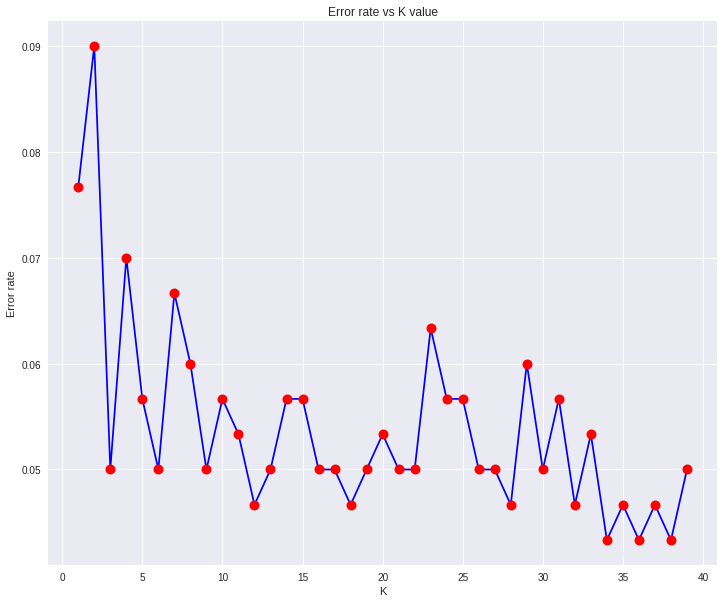

In [40]:
plt.figure(figsize=(12,10))
plt.plot(range(1,40),error_rate,color= 'blue',marker='o',markersize=10,markerfacecolor='red')
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel('Error rate')

In [42]:
knn =KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))

[[153   9]
 [  6 132]]


             precision    recall  f1-score   support

          0       0.96      0.94      0.95       162
          1       0.94      0.96      0.95       138

avg / total       0.95      0.95      0.95       300

